In [36]:
from PIL import Image
import cv2
import numpy as np
from PIL.ImageOps import grayscale
from matplotlib import pyplot as plt
import pandas as pd
import os
import seaborn as sns
import mahotas

In [2]:
df = pd.read_csv("data/Training_set.csv")
file_names = df.iloc[:, 0].tolist()

In [3]:
heights = []
widths = []
for file_name in file_names:
    try:
        with Image.open(f"data/train/{file_name}") as img:
            width, height = img.size
            heights.append(height)
            widths.append(width)
    except FileNotFoundError:
        heights.append(None)
        widths.append(None)
        print(file_name + " is not available")
        continue

In [4]:
df['height'] = heights
df['width'] = widths

Text(0, 0.5, 'Count')

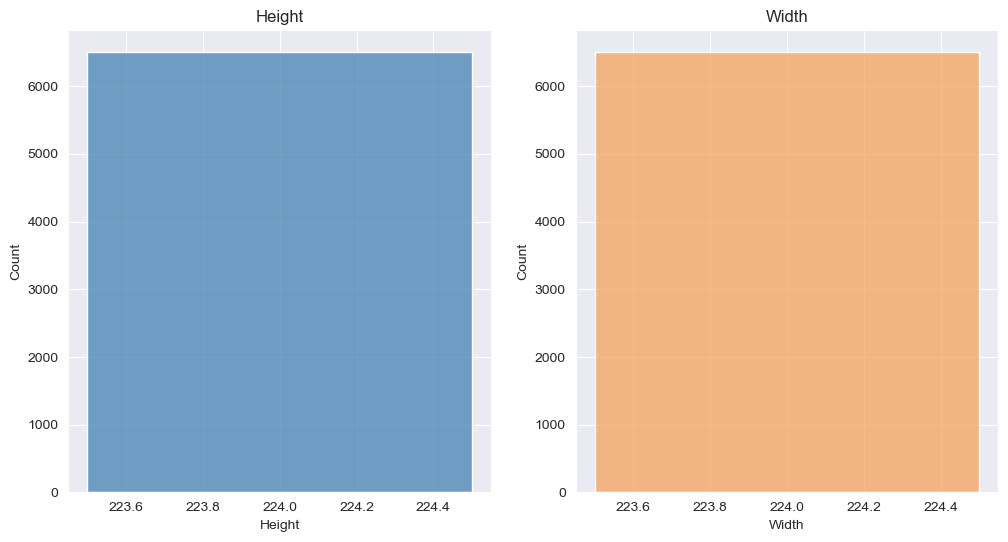

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='height', color='steelblue', ax=axes[0])
axes[0].set_title('Height')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Count')

sns.histplot(data=df, x='width', color='sandybrown', ax=axes[1])
axes[1].set_title('Width')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Count')


Wszystkie obrazy mają wymiary 224x224

In [12]:
imgs = []

for file_name in file_names:
    try:
        imgs.append(cv2.imread(f"data/train/{file_name}"))
    except:
        print(file_name + " is not available")
        continue

In [13]:
blues = []
greens = []
reds = []

for img in imgs:
    b_channel, g_channel, r_channel = cv2.split(img)
    blues.append(b_channel)
    greens.append(g_channel)
    reds.append(r_channel)

greens = np.stack(greens, axis=0)
blues = np.stack(blues, axis=0)
reds = np.stack(reds, axis=0)

var_per_pixel_green = greens.var(axis=0)
var_per_pixel_blue = blues.var(axis=0)
var_per_pixel_red = reds.var(axis=0)


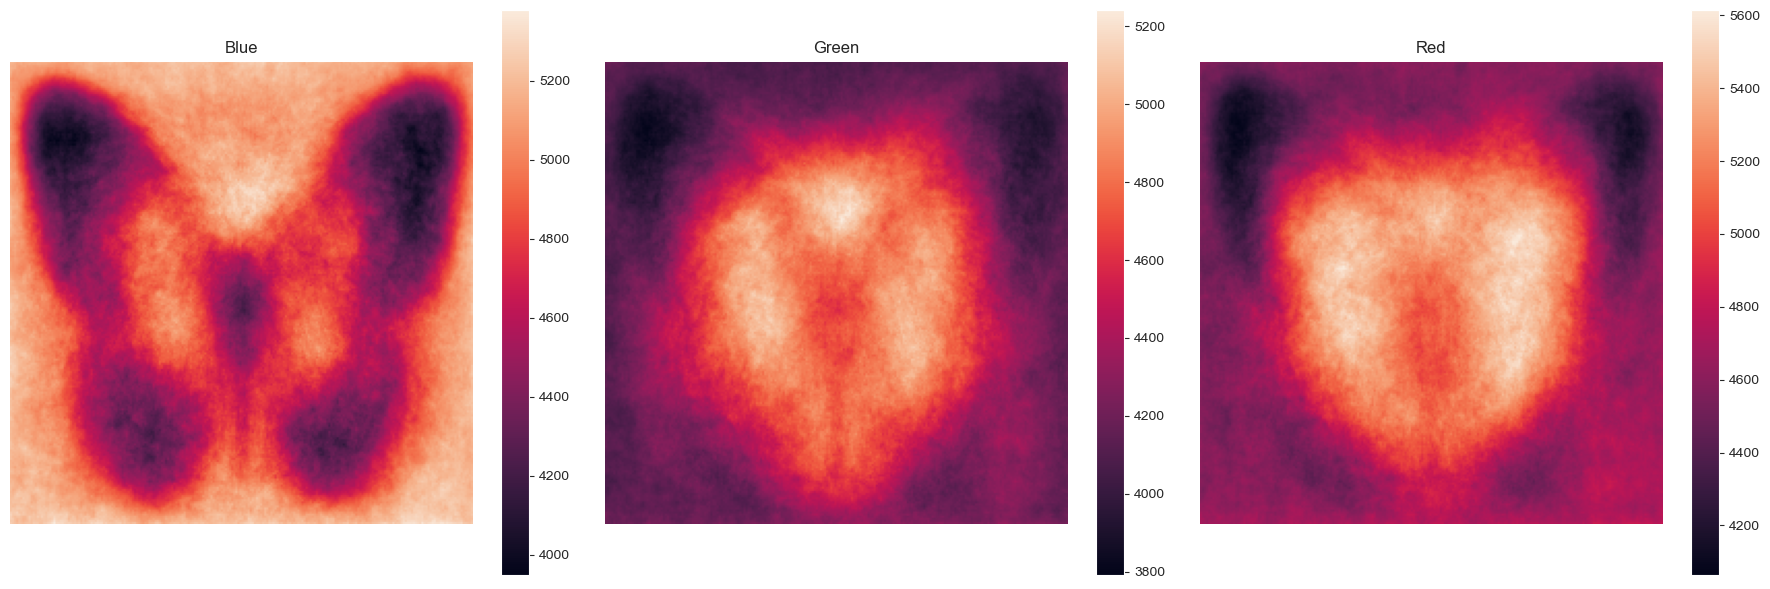

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(var_per_pixel_blue, aspect='equal')
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(var_per_pixel_green, aspect='equal')
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(var_per_pixel_red, aspect='equal')
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

Wariancja pikselów dla danego koloru

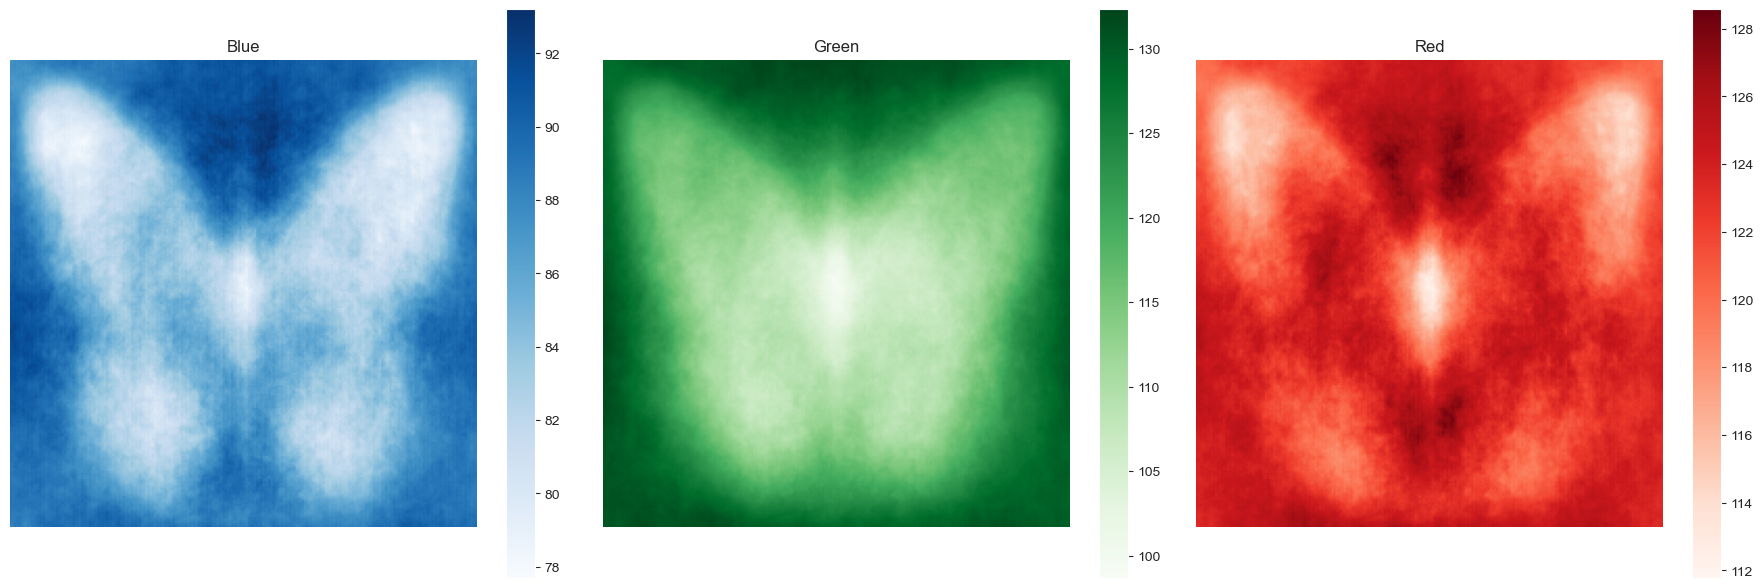

In [15]:
mean_per_pixel_blue = np.mean(blues, axis=0)
mean_per_pixel_green = np.mean(greens, axis=0)
mean_per_pixel_red = np.mean(reds, axis=0)

fig, axes = plt.subplots(1, 3, figsize=(18,6))
axes[0].imshow(mean_per_pixel_blue, aspect='equal', cmap=plt.cm.Blues)
axes[0].set_title('Blue')
axes[0].axis('off')
fig.colorbar(axes[0].images[0], ax=axes[0])

axes[1].imshow(mean_per_pixel_green, aspect='equal', cmap=plt.cm.Greens)
axes[1].set_title('Green')
axes[1].axis('off')
fig.colorbar(axes[1].images[0], ax=axes[1])

axes[2].imshow(mean_per_pixel_red, aspect='equal', cmap=plt.cm.Reds)
axes[2].set_title('Red')
axes[2].axis('off')
fig.colorbar(axes[2].images[0], ax=axes[2])

plt.tight_layout()
plt.show()

Średnie natęzenie pikselów dla danego koloru

In [21]:
blues_mean = []
greens_mean = []
reds_mean = []

for img in imgs:
    b_channel, g_channel, r_channel = cv2.split(img)
    blues_mean.append(b_channel.mean())
    greens_mean.append(g_channel.mean())
    reds_mean.append(r_channel.mean())

df['blue_mean'] = blues_mean
df['green_mean'] = greens_mean
df['red_mean'] = reds_mean

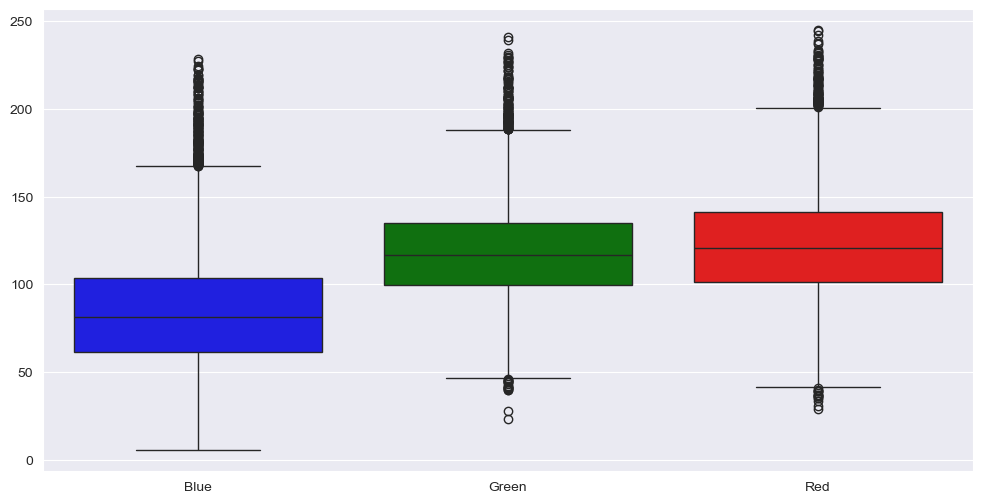

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['blue_mean', 'green_mean', 'red_mean']], palette=['blue','green','red'])
plt.xticks([0,1,2], ['Blue', 'Green', 'Red'])
plt.show()

Średnie natężenia danych kolorów

# Haralick featrures

In [32]:
grayscale_imgs = []

for img in imgs:
    grayscale_imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))


In [42]:
features = []
for img in grayscale_imgs:
    feature = mahotas.features.haralick(img, return_mean=True)
    features.append(feature)


In [43]:
df_features = pd.DataFrame(features, columns=["ASM", "contrast", "correlation", "variance", "homogeneity", "sum_average", "sum_variance", "sum_entropy", "entropy", "diff_variance", "diff_entropy", "IMC1", "IMC2",])

In [46]:
df = pd.concat([df, df_features], axis=1)

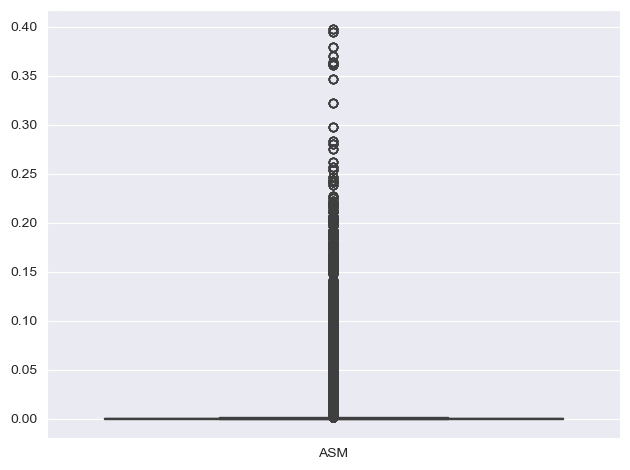

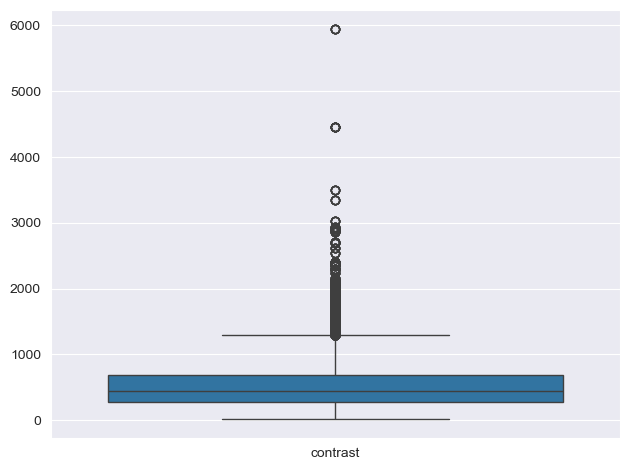

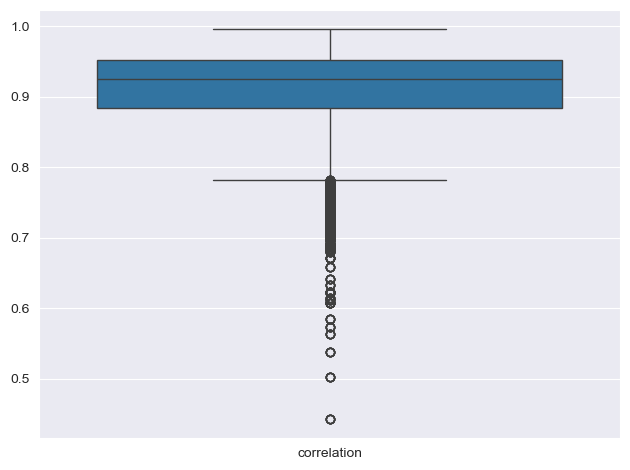

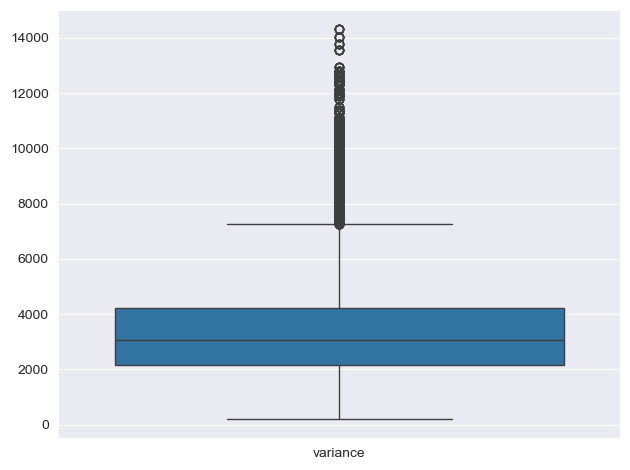

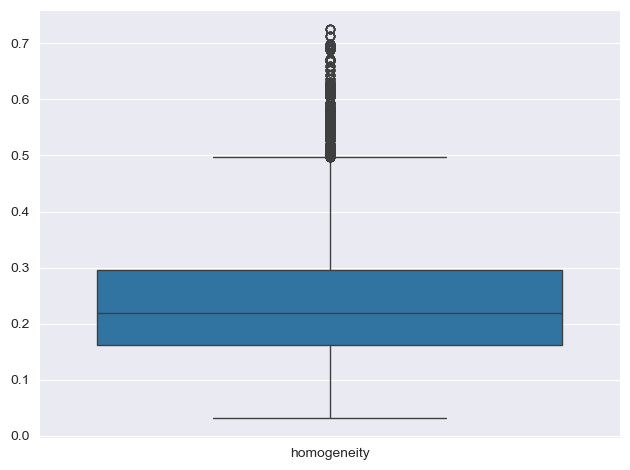

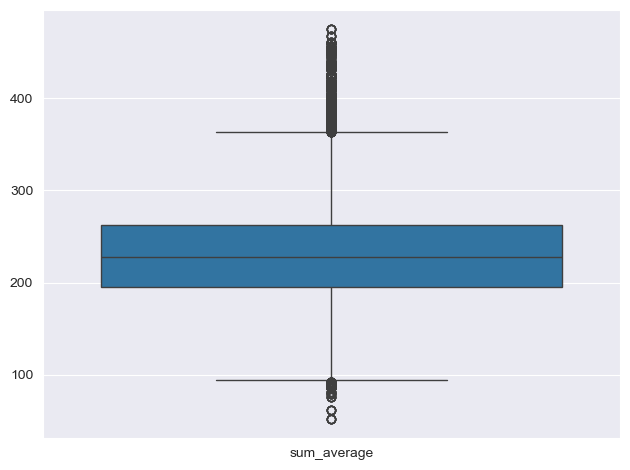

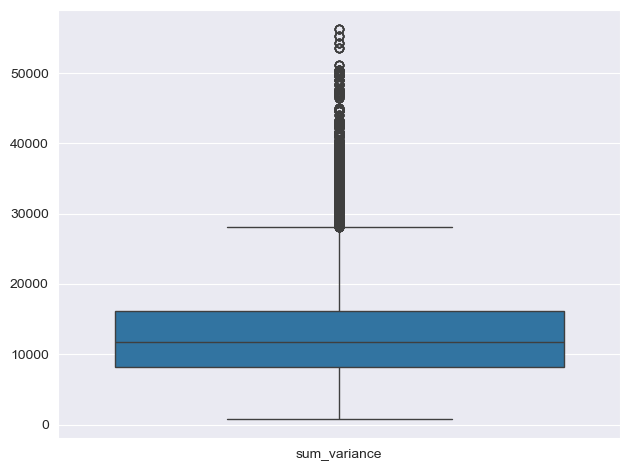

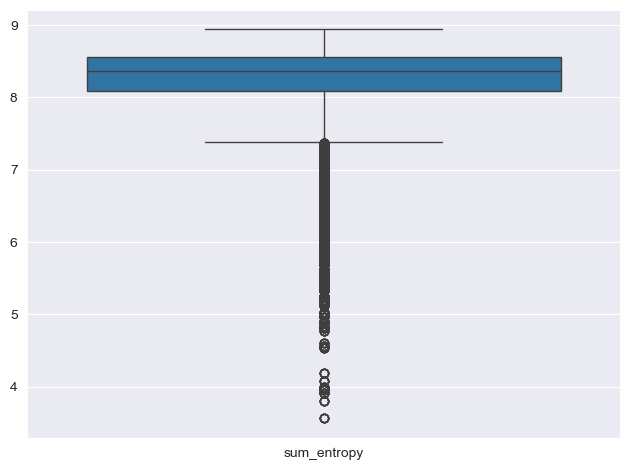

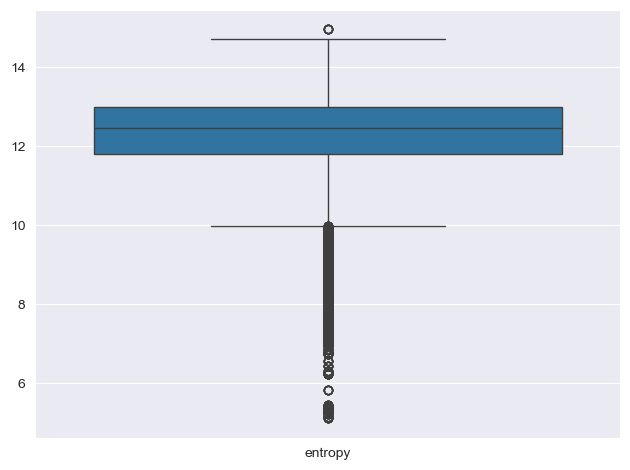

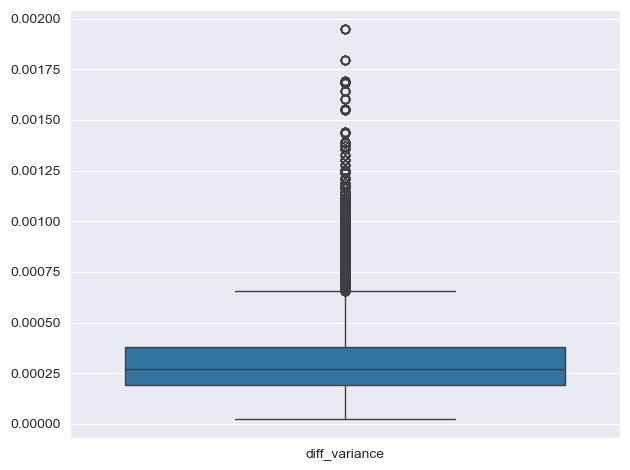

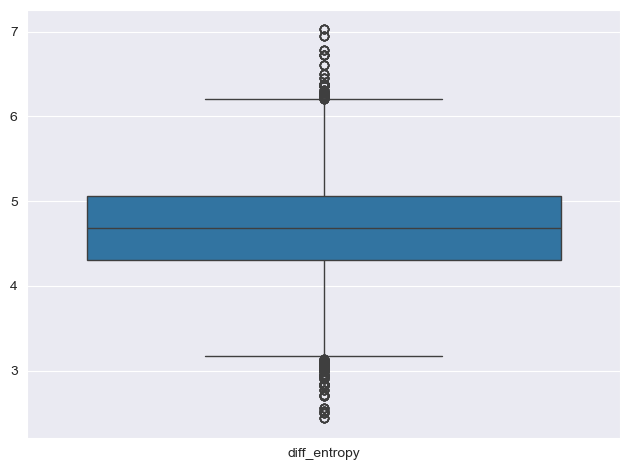

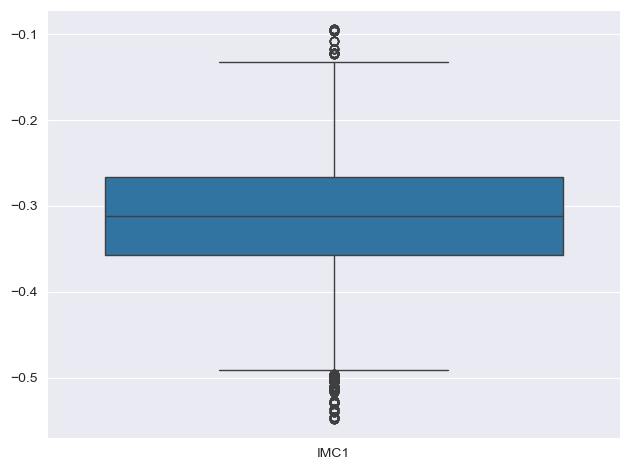

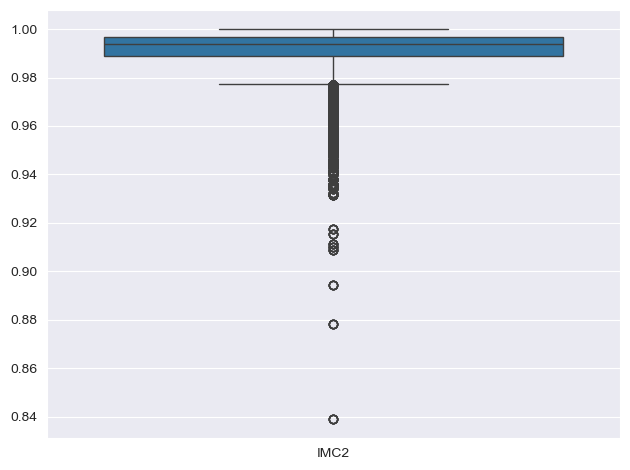

In [51]:
for feature in df_features.columns:
    plt.figure()
    sns.boxplot(data=df[feature])
    plt.tight_layout()
    plt.show()